### Загрузите данные файла planets.csv о планетах в разных планетных системах галлактики (планеты одной системы идут в списке рядом). Поля данных:  способ обнаружения, число планет в системе своего «солнца», период обращения вокруг своего «солнца», масса планеты, расстояние от центра планетной системы до нашего Солнца, год обнаружения.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import ascii_uppercase

In [3]:
df = pd.read_csv("planets.csv", delimiter=";")
print(df)

               method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]


### Получите описание данных: число записей, число полей.

In [4]:
print(f"columns: {len(df.columns)}, rows: {len(df)}")

columns: 6, rows: 1035


### По каждому полю определите:

#### * тип поля: категориальный, порядковый, числовой, текстовый)

#### * число имеющихся значений,

#### * число уникальных значений,

#### * число отсутствующих значений.

In [15]:

for col in df.columns:
    print(col)
    print(f"    Values amount: {len(df[col])} | not nan: {df[col].count()}")
    print(f"    Unique values amount: {(df[col]).nunique()}")
    print(f"    Empty values amount: {(df[col].isna()).sum()}")
print("""
    method:             категориальный
    number:             порядковый
    orbital_period:     числовой
    mass:               числовой
    distance:           числовой
    year:               порядковый
""")

method
    Values amount: 1035 | not nan: 1035
    Unique values amount: 10
    Empty values amount: 0
number
    Values amount: 1035 | not nan: 1035
    Unique values amount: 7
    Empty values amount: 0
orbital_period
    Values amount: 1035 | not nan: 992
    Unique values amount: 988
    Empty values amount: 43
mass
    Values amount: 1035 | not nan: 513
    Unique values amount: 381
    Empty values amount: 522
distance
    Values amount: 1035 | not nan: 808
    Unique values amount: 552
    Empty values amount: 227
year
    Values amount: 1035 | not nan: 1035
    Unique values amount: 23
    Empty values amount: 0

    method:             категориальный
    number:             порядковый
    orbital_period:     числовой
    mass:               числовой
    distance:           числовой
    year:               порядковый



### По каждому числовому полю определите: мин, макс, среднее, медиану, среднеквадратическое отклонение.

In [29]:
for col in ["orbital_period", "mass", "distance"]:
    try:
        print(f"""
            {col}
                min: {df[col].min()}
                max: {df[col].max()}
                avg: {df[col].mean()}
                med: {df[col].median()}
                msd: {df[col].std()}
        """)
    except:
        pass


            orbital_period
                min: 0.09070629
                max: 730000.0
                avg: 2002.9175960947582
                med: 39.9795
                msd: 26014.728304062508
        

            mass
                min: 0.0036
                max: 25.0
                avg: 2.6381605847953216
                med: 1.26
                msd: 3.8186166509616046
        

            distance
                min: 1.35
                max: 8500.0
                avg: 264.06928217821786
                med: 55.25
                msd: 733.1164929404421
        


### По каждой категории: число планет и средние значения остальных признаков.

In [32]:
df.groupby(["method"]).agg({
    "number": np.sum,
    "orbital_period": np.mean,
    "mass": np.mean,
    "distance": np.mean,
    "year": np.mean,
})

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,631.180000,NaN,17.875000,2011.500000
Eclipse Timing Variations,15,4751.644444,5.125000,315.360000,2010.000000
Imaging,50,118247.737500,NaN,67.715937,2009.131579
Microlensing,27,3153.571429,NaN,4144.000000,2009.782609
Orbital Brightness Modulation,5,0.709307,NaN,1180.000000,2011.666667
Pulsar Timing,11,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1,1170.000000,NaN,NaN,2007.000000
Radial Velocity,952,823.354680,2.630699,51.600208,2007.518987
Transit,776,21.102073,1.470000,599.298080,2011.236776


### Определите число записей, имеющих пропуски данных и общее число пропусков.

In [35]:
all_na = 0
rows_na = len(df[df.isna().any(axis=1)])
for col in df.columns:
    all_na += df[col].isna().sum()
print(f"Rows with NaN: {rows_na}, all NaN: {all_na}")

Rows with NaN: 537, all NaN: 792


### Для каждого числа возможных пропусков в отдельной записи (от 0 до укажите, в скольких записях столько пропусков.

In [37]:
df.isna().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1030    1
1031    1
1032    1
1033    1
1034    1
Length: 1035, dtype: int64

### Для каждого года обнаружения планеты укажите среднее число пропусков данных для одной планеты.

In [96]:
df_nans = df.agg(lambda x: x.isna().sum(), axis=1) # .sum(axis=1)
df_nans = df.merge(df_nans.rename("nans"), left_index=True, right_index=True).groupby("year").mean()["nans"]
df_nans

C:\Users\WinNi\AppData\Local\Temp\ipykernel_17828\3050150768.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_nans = df.merge(df_nans.rename("nans"), left_index=True, right_index=True).groupby("year").mean()["nans"]


year
1989    0.000000
1992    2.000000
1994    2.000000
1995    0.000000
1996    0.333333
1997    0.000000
1998    0.000000
1999    0.066667
2000    0.125000
2001    0.083333
2002    0.062500
2003    0.160000
2004    0.692308
2005    0.205128
2006    0.548387
2007    0.566038
2008    0.621622
2009    0.418367
2010    0.745098
2011    0.675676
2012    1.235714
2013    1.237288
2014    1.807692
Name: nans, dtype: float64

### Для каждой категории укажите среднее число пропусков данных для одной планеты.

In [95]:
df_nans = df.agg(lambda x: x.isna().sum(), axis=1) # .sum(axis=1)
df_nans = df.merge(df_nans.rename("nans"), left_index=True, right_index=True).groupby("method").mean()["nans"]
df_nans

method
Astrometry                       1.000000
Eclipse Timing Variations        1.333333
Imaging                          1.842105
Microlensing                     2.260870
Orbital Brightness Modulation    1.333333
Pulsar Timing                    1.800000
Pulsation Timing Variations      2.000000
Radial Velocity                  0.119349
Transit                          1.433249
Transit Timing Variations        1.500000
Name: nans, dtype: float64

### Удалите записи с число пропусков более 2-х.

In [115]:
df_temp = pd.concat([df.isna().sum(axis=1).to_frame("nans"), df], axis=1)
df_temp[df_temp["nans"] < 2][["method", "number", "orbital_period", "mass", "distance", "year"]]

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


### Замените пропуски на (по вариантам: 0 – на среднее значение признака по всему набору, 1 – на среднее значение признака по категории, 2 – на значение случайного объекта этой же категории, 3 – на среднее значение трех случайных объектов этой же категории, 4 – на значение ближайшего объекта этой же категории, 5 – на среднее значение трех ближайших объектов этой же категории, номер варианта равен N mod 6, где N – ваш номер по списку преподавателя).

In [116]:
for col in ["number", "orbital_period", "mass", "distance", "year"]:
    df_temp[col].fillna((df_temp[col].mean()), inplace=True)
df_temp

,nans,method,number,orbital_period,mass,distance,year
0,0,Radial Velocity,1,269.300000,7.100000,77.40,2006
1,0,Radial Velocity,1,874.774000,2.210000,56.95,2008
2,0,Radial Velocity,1,763.000000,2.600000,19.84,2011
3,0,Radial Velocity,1,326.030000,19.400000,110.62,2007
4,0,Radial Velocity,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...,...,...
1030,1,Transit,1,3.941507,2.638161,172.00,2006
1031,1,Transit,1,2.615864,2.638161,148.00,2007
1032,1,Transit,1,3.191524,2.638161,174.00,2007
1033,1,Transit,1,4.125083,2.638161,293.00,2008


### Добавьте поле «код планеты», куда внесите составной код, типа В74, построенный по правилу: в качестве числа уникальный номер планетной системы, где обнаружена планета (признак принадлежности нескольких планет к одной системе: расположение в списке рядом, одинаковое число планет в системе, одинаковое расстояние до Солнца), а в качестве буквы – номер планеты от центра системы (1-А, 2-В, 3-С, 4-D, …), который определяется по возрастанию периода обращения.

In [117]:
df_temp["code"] = ""
last_rows = 0
current_system_ind = 0
planet_ind = 0
for i in df_temp.index:
    if not last_rows:
        planet_ind = 0
        current_system_ind += 1
        last_rows = df_temp.at[i, "number"]
    df_temp.at[i, "code"] = f"{ascii_uppercase[planet_ind]}{current_system_ind}"
    planet_ind += 1
    last_rows -= 1
df_temp

,nans,method,number,orbital_period,mass,distance,year,code
0,0,Radial Velocity,1,269.300000,7.100000,77.40,2006,A1
1,0,Radial Velocity,1,874.774000,2.210000,56.95,2008,A2
2,0,Radial Velocity,1,763.000000,2.600000,19.84,2011,A3
3,0,Radial Velocity,1,326.030000,19.400000,110.62,2007,A4
4,0,Radial Velocity,1,516.220000,10.500000,119.47,2009,A5
...,...,...,...,...,...,...,...,...
1030,1,Transit,1,3.941507,2.638161,172.00,2006,A769
1031,1,Transit,1,2.615864,2.638161,148.00,2007,A770
1032,1,Transit,1,3.191524,2.638161,174.00,2007,A771
1033,1,Transit,1,4.125083,2.638161,293.00,2008,A772


### Для каждого набора (старого и нового) постройте четыре типа диаграмм:

- гистограмма каждого числового признака по всему датасету и по отдельным категориям,

- для каждого числового признака набор ящиков с усами по всем категориям,

- тепловую карту корреляций для числовых признаков (номер планеты в системе, число планет в системе, период обращения, масса, расстояние, год обнаружения) для всего датасета, для самой массовой и для самой редкой категории.

- парные диаграммы рассеяния для всех пар признаков по всему датасету.

In [118]:
print(len(df_temp))
df_temp["orbital_period"]

1035


0       269.300000
1       874.774000
2       763.000000
3       326.030000
4       516.220000
           ...    
1030      3.941507
1031      2.615864
1032      3.191524
1033      4.125083
1034      4.187757
Name: orbital_period, Length: 1035, dtype: float64

array([[<AxesSubplot: title={'center': 'nans'}>,
        <AxesSubplot: title={'center': 'number'}>],
       [<AxesSubplot: title={'center': 'orbital_period'}>,
        <AxesSubplot: title={'center': 'mass'}>],
       [<AxesSubplot: title={'center': 'distance'}>,
        <AxesSubplot: title={'center': 'year'}>]], dtype=object)

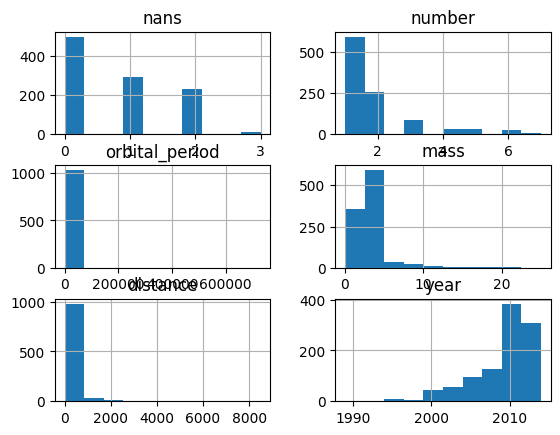

In [119]:
# fig, axs = plt.subplots(1, 3)
# n_bins = len(df_temp)
#
# axs[0].hist(df_temp["orbital_period"], bins=500)
# axs[0].set_title("orbital period")
#
# axs[1].hist(df_temp["mass"], bins=500)
# axs[1].set_title("mass")
#
# axs[2].hist(df_temp["distance"], bins=500)
# axs[2].set_title("distance")
df_temp.hist()

array([[<AxesSubplot: title={'center': 'nans'}>,
        <AxesSubplot: title={'center': 'number'}>],
       [<AxesSubplot: title={'center': 'orbital_period'}>,
        <AxesSubplot: title={'center': 'mass'}>],
       [<AxesSubplot: title={'center': 'distance'}>,
        <AxesSubplot: title={'center': 'year'}>]], dtype=object)

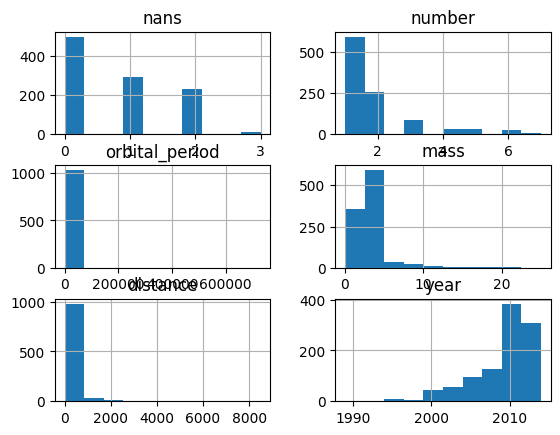

In [120]:
df_temp2 = df_temp.copy() #.set_index("method").hist()
df_temp2.set_index("method")
df_temp2.hist()